# project-marketing-promotion


## Step 1: Imports

### Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
data = pd.read_csv('marketing_sales_data.csv')
print(data.head(5))
print(data.shape)

       TV      Radio  Social Media Influencer       Sales
0     Low   3.518070      2.293790      Micro   55.261284
1     Low   7.756876      2.572287       Mega   67.574904
2    High  20.348988      1.227180      Micro  272.250108
3  Medium  20.108487      2.728374       Mega  195.102176
4    High  31.653200      7.776978       Nano  273.960377
(572, 5)


## Step 2: Data exploration

### Create a pairplot of the data

Create a pairplot to visualize the relationship between the continous variables in `data`.

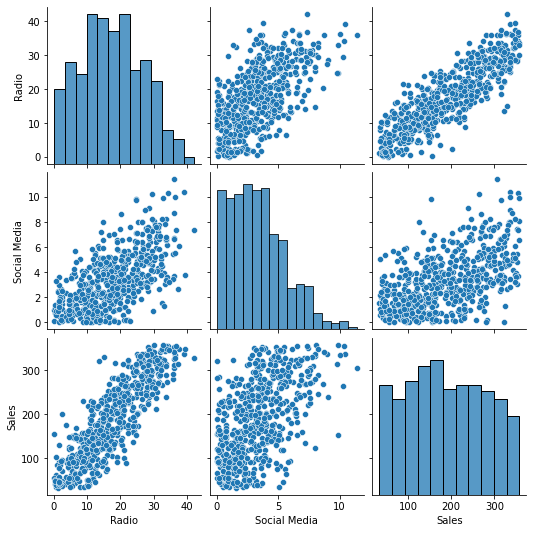

In [3]:
sns.pairplot(data)

### Calculate the mean sales for each categorical variable

In [4]:
# Calculate the mean sales for each TV category. 
print(data.groupby(by=['TV'])['Sales'].mean())

# Calculate the mean sales for each Influencer category. 
print(data.groupby(by=['Influencer'])['Sales'].mean())

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64
Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64


### Remove missing data

In [5]:
# Drop rows that contain missing data and update the DataFrame.
print(data.shape)
print(data.isna().any().sum())

data = data.dropna(axis=0)
print(data.shape)

(572, 5)
0
(572, 5)


### Clean column names

In [6]:
# Rename all columns in data that contain a space. 
data = data.rename(columns={'Social Media':'Social_Media'})
print(data)

         TV      Radio  Social_Media Influencer       Sales
0       Low   3.518070      2.293790      Micro   55.261284
1       Low   7.756876      2.572287       Mega   67.574904
2      High  20.348988      1.227180      Micro  272.250108
3    Medium  20.108487      2.728374       Mega  195.102176
4      High  31.653200      7.776978       Nano  273.960377
..      ...        ...           ...        ...         ...
567  Medium  14.656633      3.817980      Micro  191.521266
568    High  28.110171      7.358169       Mega  297.626731
569  Medium  11.401084      5.818697       Nano  145.416851
570  Medium  21.119991      5.703028      Macro  209.326830
571     Low  13.221237      3.660566      Micro  135.773151

[572 rows x 5 columns]


## Step 3: Model building

### Fit a multiple linear regression model that predicts sales

In [7]:
# Define the OLS formula.

ols_data=data

# Create an OLS model.
ols_formula='Sales ~ C(TV) + Radio'
from statsmodels.formula.api import ols
OLS = ols(formula = ols_formula, data=ols_data)

# Fit the model.
model = OLS.fit()

# Save the results summary.
model_result = model.summary()

# Display the model results.
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          1.63e-288
Time:                        02:46:00   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Text(0.5, 1.0, 'Social Media vs Sales')

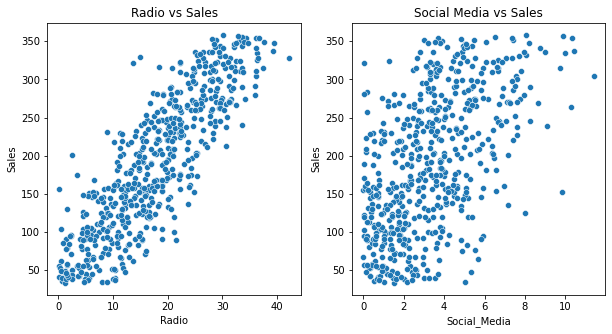

In [8]:
# Create a scatterplot for each independent variable and the dependent variable.

fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(x=data['Radio'], y=data['Sales'], ax=axes[0])
axes[0].set_title('Radio vs Sales')

sns.scatterplot(x=data['Social_Media'],y=data['Sales'],ax=axes[1])
axes[1].set_title('Social Media vs Sales')

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

Text(0.5, 1.0, 'Q-Q-plot of residuals')

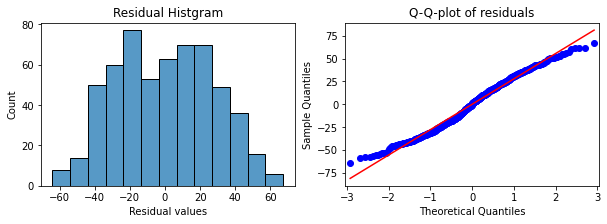

In [9]:
# Calculate the residuals.
residuals=model.resid

# Create a histogram with the residuals. 
fig, axes = plt.subplots(1,2, figsize=(10,3))
sns.histplot(residuals, ax=axes[0])
axes[0].set_xlabel('Residual values')
axes[0].set_title('Residual Histgram')

# Create a Q-Q plot of the residuals.
import statsmodels.api as sm
sm.qqplot(residuals,line='s', ax=axes[1])
axes[1].set_title('Q-Q-plot of residuals')

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

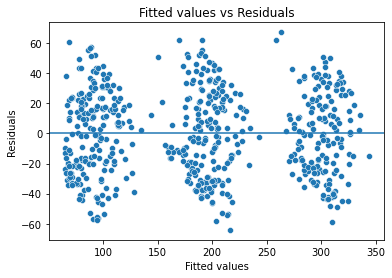

In [10]:
# Create a scatterplot with the fitted values from the model and the residuals.

fitted_values = model.fittedvalues
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add a line at y = 0 to visualize the variance of residuals above and below 0.
fig.axhline(0)
fig.set_xlabel('Fitted values')
fig.set_ylabel('Residuals')
fig.set_title('Fitted values vs Residuals')
plt.show()

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

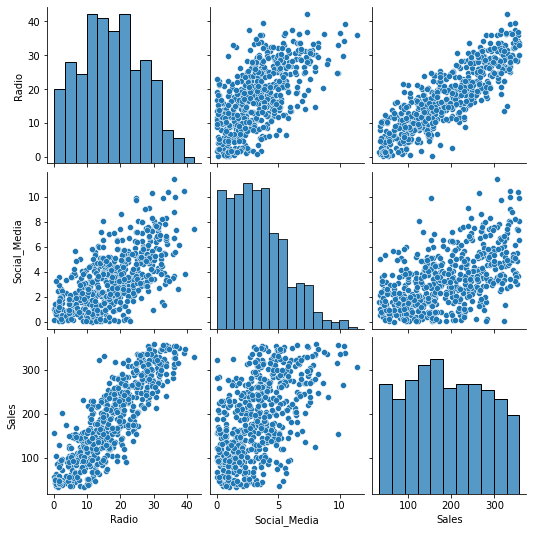

In [11]:
# Create a pairplot of the data.
sns.pairplot(data)

In [12]:
# Calculate the variance inflation factor (optional).

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif


,VIF
Radio,5.170922
Social_Media,5.170922


## Step 4: Results and evaluation

### Display the OLS regression results

If the model assumptions are met, you can interpret the model results accurately.

First, display the OLS regression results.

In [13]:
# Display the model results summary.
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          1.63e-288
Time:                        02:46:00   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpret model coefficients

With the model fit evaluated, you can look at the coefficient estimates and the uncertainty of these estimates.

Again, display the OLS regression results.

In [14]:
# Display the model results summary.
model_result

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Sat, 27 Apr 2024   Prob (F-statistic):          1.63e-288
Time:                        02:46:00   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Conclusion

Switching from high to med TV promotional budget reduces sales by $\$75$ million (95\% CI \[-82 -68\])<br>
Switching from high to low TV promotional budget reduces sales by $\$154$ million (95\% CI \[-164 -145\])<br>

Radio has a positive coefficient of 2.97. i.e. Sales increases $\$3$ million per $\$1$ million promotion in Radio.<br>
<br>
Therefore, recommend to promote highly in TV

#### **References**

Saragih, H.S. (2020). [*Dummy Marketing and Sales Data*](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data).